# Neural Network Meta Model

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import ticker
import pycountry_convert as pc  
from sklearn.metrics import mean_absolute_error
from matplotlib import ticker
from scipy.stats import linregress

In [ ]:
# Organize Regression Model Predictions (Input for Meta-Model)
pred_co2 = np.random.rand(100, 1)  
pred_deforestation = np.random.rand(100, 1)  
pred_ocean_temp = np.random.rand(100, 1)  
actual_temp = np.random.rand(100, 1)  # Actual temperature values

# Need to make sure that each dataset (df_co2, df_deforestation, df_ocean_temp) 
# has a matching year column (or another common key) so that they align and we can test on
# the actual tempreature values.

# Stack predictions to form input features for meta-model
X_meta = np.hstack([pred_co2, pred_deforestation, pred_ocean_temp])
Y_meta = actual_temp 

In [ ]:
# Define the neural network meta-model
meta_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1) 
])

meta_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

meta_model.fit(X_meta, Y_meta, epochs=100, batch_size=10, verbose=1)

Epoch 1/100


/Users/laurenfeldman/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3696 - mae: 0.5196  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2696 - mae: 0.4353 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1722 - mae: 0.3381 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1352 - mae: 0.3132 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1191 - mae: 0.2936 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1130 - mae: 0.2931 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1067 - mae: 0.2799 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1192 - mae: 0.2998 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0970 - mae: 0.2621 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0964 - mae: 0.2651 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0918 - mae: 0.2585 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1041 - mae: 0.2849 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━

In [5]:
# Predictions on test data (assuming separate test set X_meta_test, Y_meta_test)
X_meta_test = np.random.rand(20, 3)  # Dummy test data
Y_meta_test = np.random.rand(20, 1)  # Dummy test labels
Y_meta_pred = meta_model.predict(X_meta_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Mean Absolute Error on Test Set: 0.26730358944743177


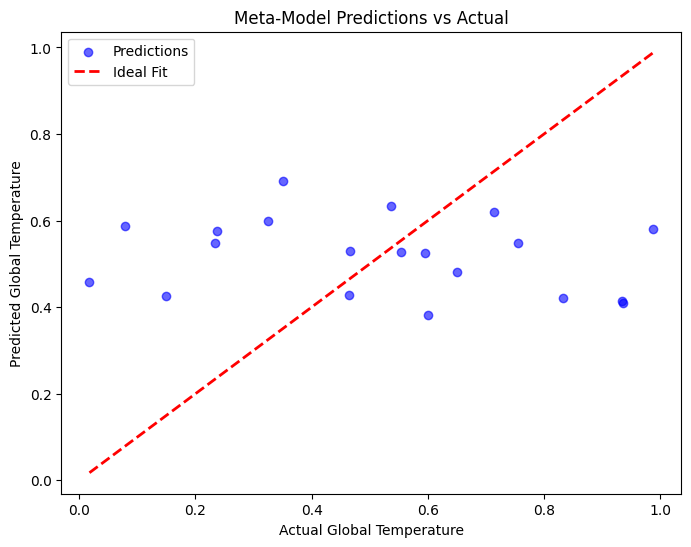

In [6]:
# Evaluate the model
mae_test = mean_absolute_error(Y_meta_test, Y_meta_pred)
print(f"Mean Absolute Error on Test Set: {mae_test}")

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_meta_test, Y_meta_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([Y_meta_test.min(), Y_meta_test.max()], [Y_meta_test.min(), Y_meta_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Global Temperature")
plt.ylabel("Predicted Global Temperature")
plt.title("Meta-Model Predictions vs Actual")
plt.legend()
plt.show()
